In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import norm

### Part 1

In [2]:
# slide 6
U = np.random.uniform(0,1)
if U < 1/6:
    X = 1
elif U < 1/2:
    X = 2
else:
    X = 3

print(X)

2


In [3]:
# slide 9
k = 50
U = np.random.uniform(0,1)
X = np.floor(k*U)
print(int(X))

17


In [4]:
# slide 17
n = 10
p = 0.4
U = np.random.uniform(0,1,n)
X = np.ceil(np.log(1-U) / np.log(p)).astype(int)
print(X)

[2 2 1 3 2 1 1 3 2 2]


### Part 2

In [5]:
# slide 5
n = 5
U = np.random.uniform(0,1,n)
X = (16*U)**(1/4)
print(X)

[1.68154518 1.06417065 1.51294767 0.55011341 1.77046711]


[1.37582355e+00 3.34890554e-01 1.22148650e-01 1.04541146e+00
 1.00431351e-01 4.07734812e-01 1.04562360e+00 7.27511610e-02
 2.79613862e-01 5.65687097e-01 1.29125271e+00 1.45547172e-01
 1.56623604e+00 5.24814284e-01 3.34340822e-01 2.63321701e-01
 1.52727550e-02 9.69182621e-01 1.31309947e-03 1.89469035e-01
 2.20680095e+00 1.77503167e-02 4.99959353e-01 2.21952714e-02
 5.49916802e-01 5.03298960e-01 1.25889313e+00 4.08250933e-01
 1.22071969e-01 1.73691744e-01 2.66664484e-02 3.82782522e-01
 1.17339966e-01 7.71233838e-01 4.17371669e-01 1.41200964e-01
 7.69981044e-01 5.04686567e-02 7.99183134e-01 1.15984709e+00
 7.07759026e-01 3.13046663e-01 5.88223077e-01 1.06069860e-01
 8.02296053e-02 2.96892912e-01 4.50687793e-01 1.93330807e-01
 6.15874508e-01 4.29250961e-01 5.11204983e-01 3.85448521e-02
 3.57040539e-01 7.00042889e-01 5.21350460e-01 9.37904583e-02
 2.22780758e-01 4.47601294e-01 7.98206275e-01 3.40084108e-01
 2.84294277e-01 4.70935312e-01 1.42126747e+00 7.62041028e-01
 4.13139731e-01 5.494398

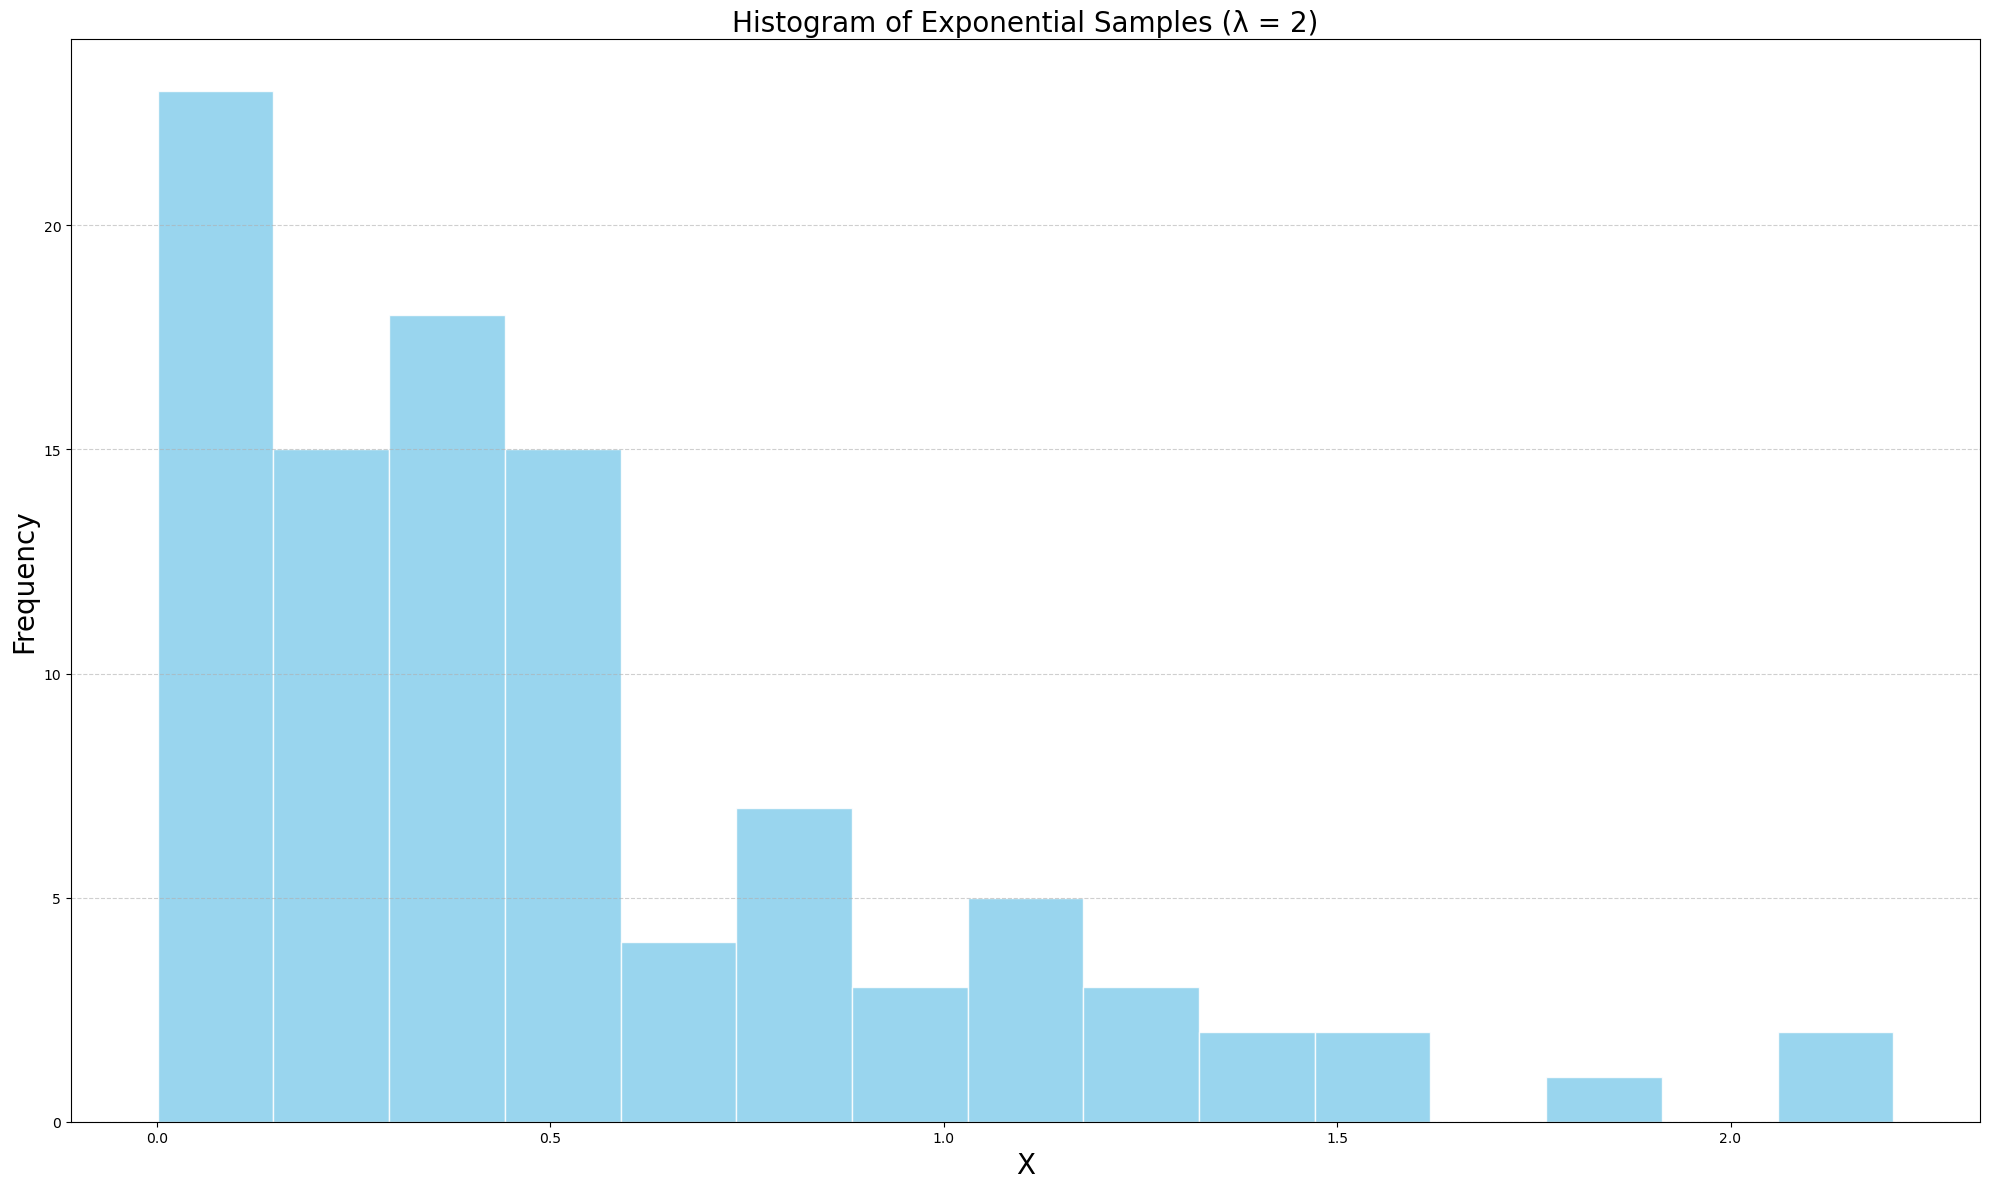

In [6]:
# slide 7
n = 100
lambda_ = 2
U = np.random.uniform(0,1,n)
X = -np.log(1-U) / lambda_
print(X)

plt.figure(figsize=(20, 12))
plt.hist(X, bins=15, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Histogram of Exponential Samples (λ = 2)", fontsize=20)
plt.xlabel("X", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Part 3

997


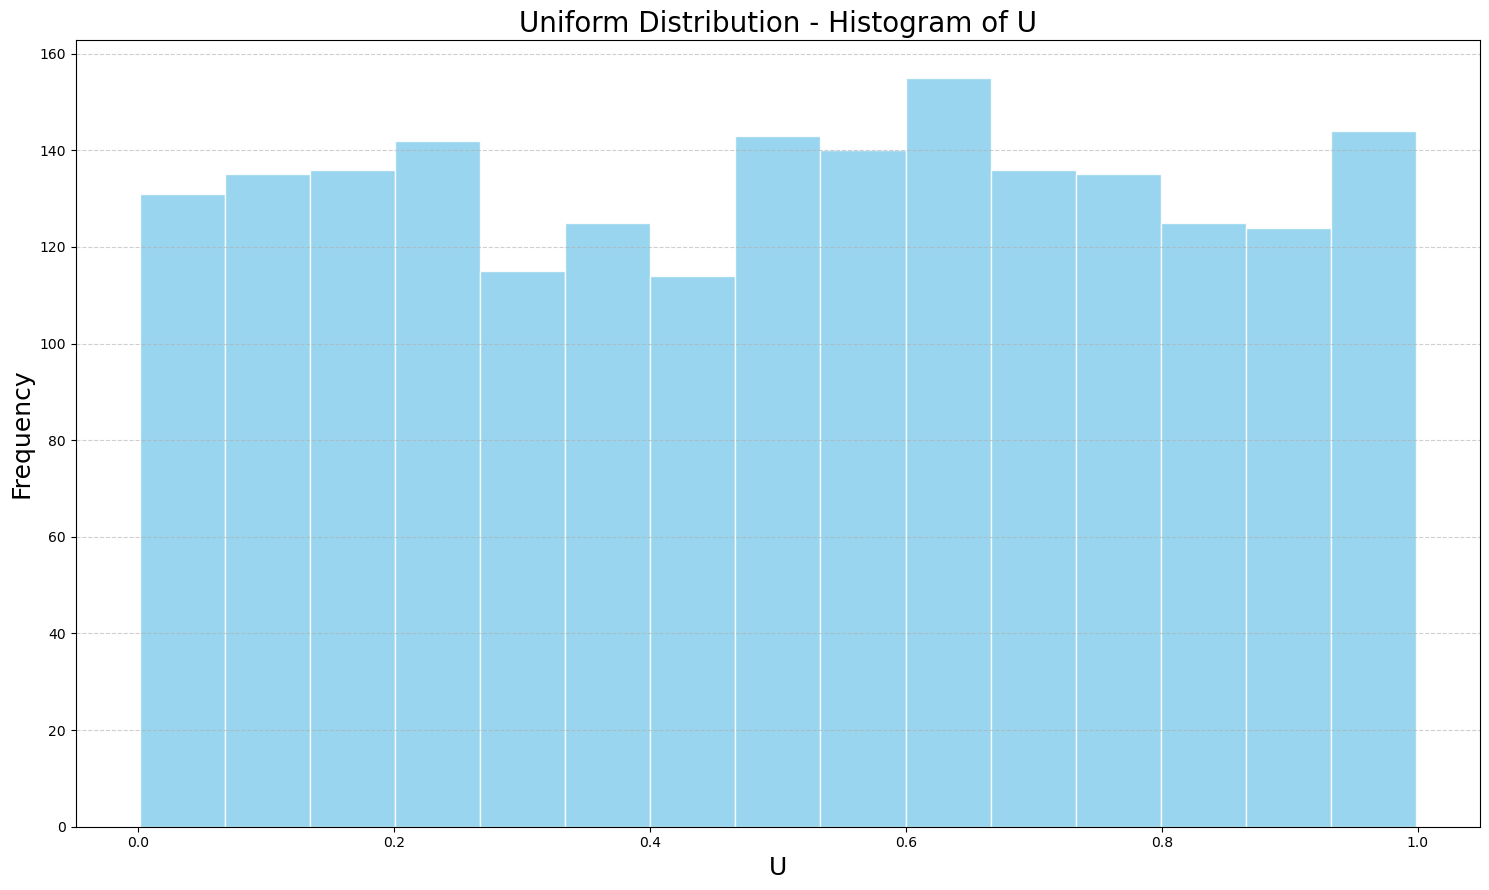

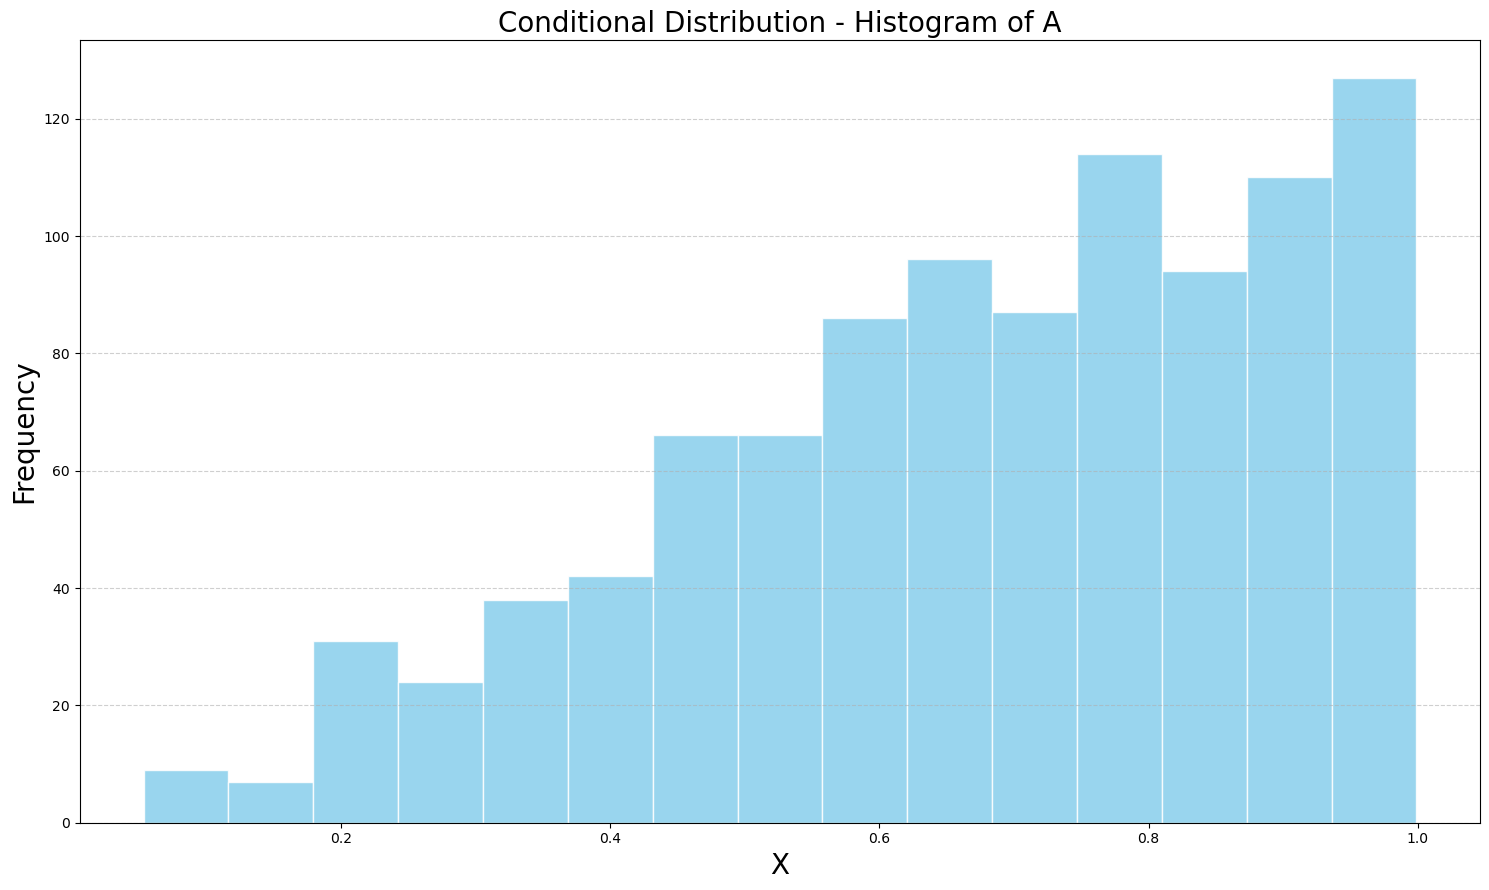

In [7]:
# slide 11
counter = 0
num_sims = 2000
U = []
A = []

for i in range(num_sims):
    u = np.random.uniform()
    d = np.random.uniform()
    U.append(u)
    if d < u:
        A.append(u)
        counter += 1

print(counter)

plt.figure(figsize=(15, 9))
plt.hist(U, bins=15, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Uniform Distribution - Histogram of U", fontsize=20)
plt.xlabel("U", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 9))
plt.hist(A, bins=15, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Conditional Distribution - Histogram of A", fontsize=20)
plt.xlabel("X", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

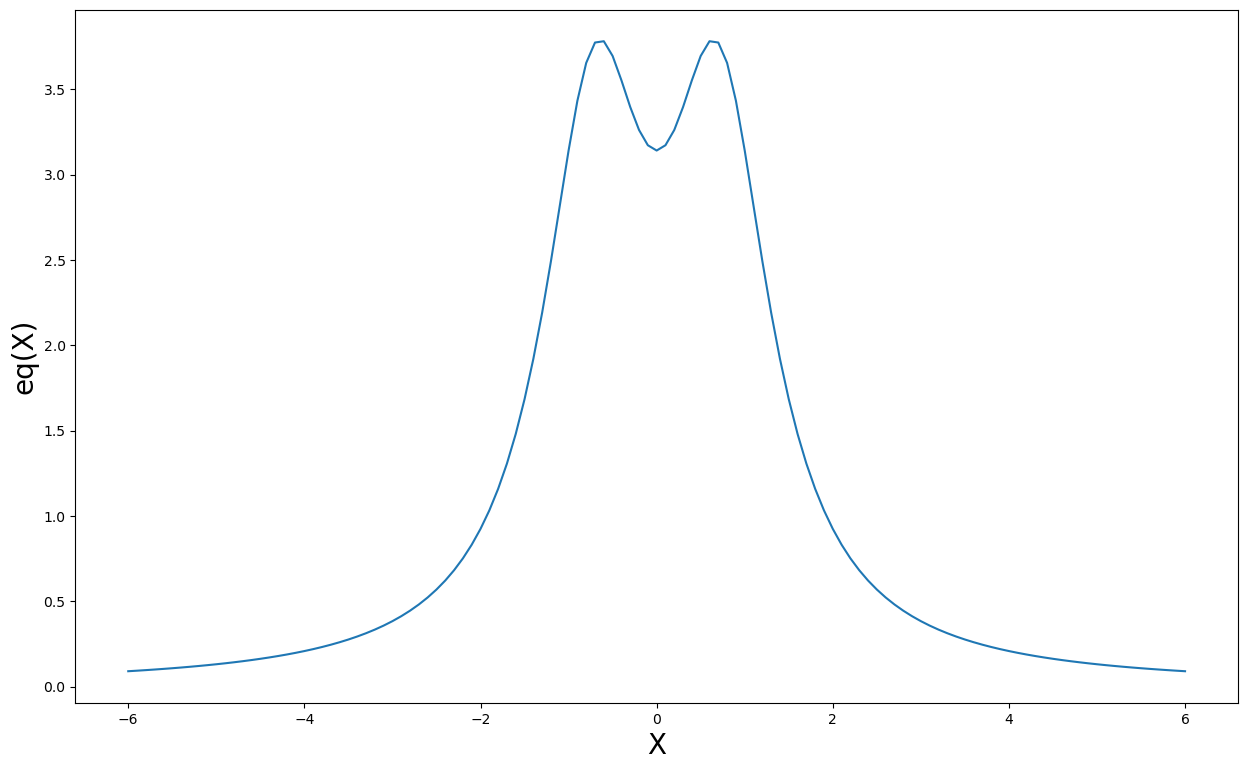

In [8]:
# slide 16
x = np.arange(-6, 6.1, 0.1)
eq = np.pi * (1 + x**2) / (1 + x**4)

plt.figure(figsize=(15, 9))
plt.plot(x, eq)
plt.xlabel("X", fontsize=20)
plt.ylabel("eq(X)", fontsize=20)
plt.show()

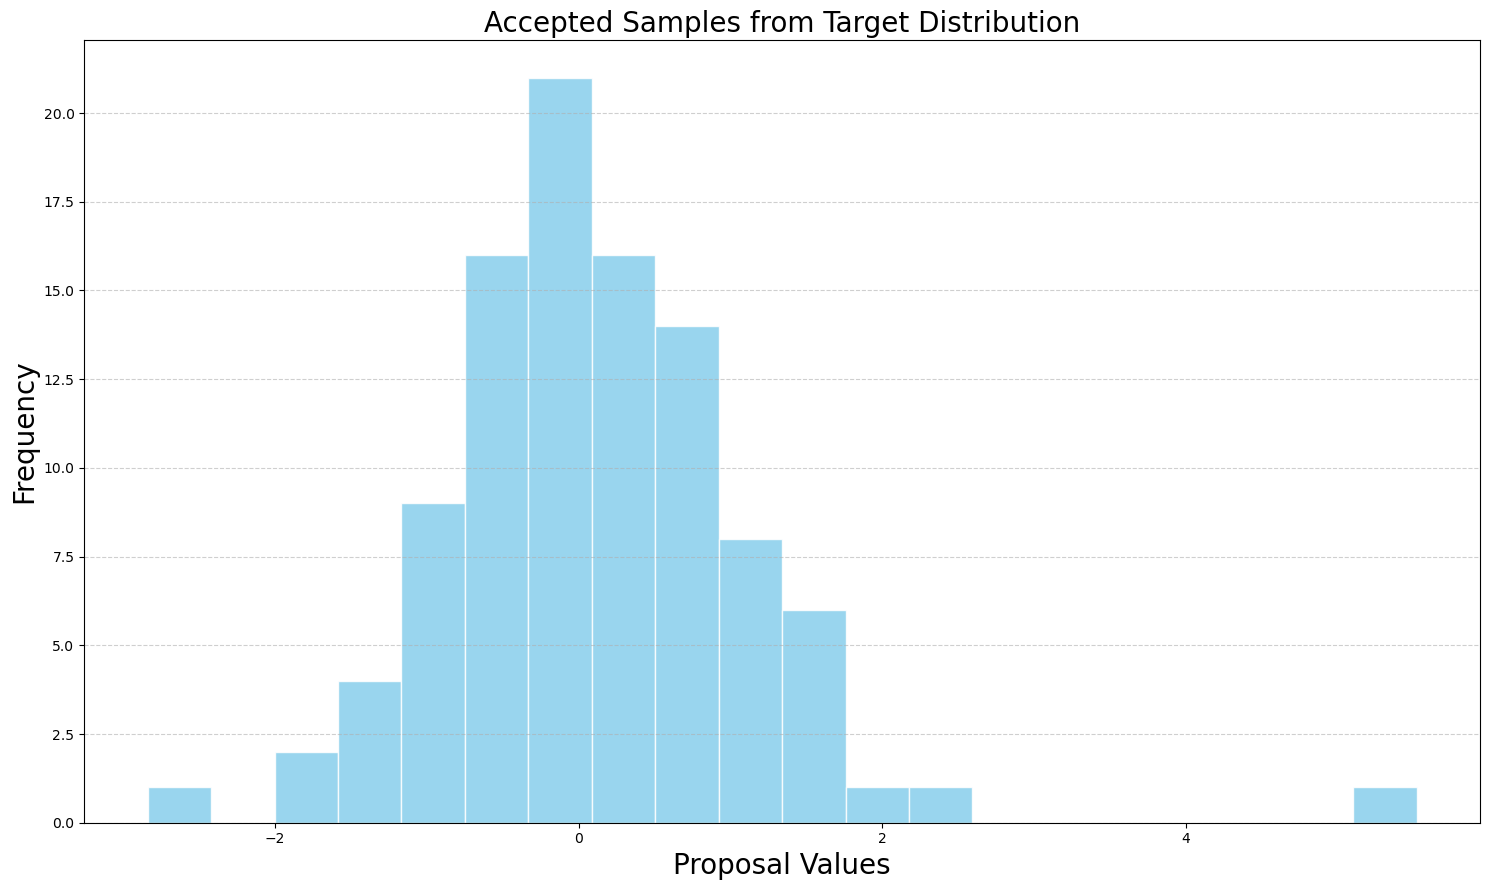

In [9]:
# slide 17
n = 100
c = 3.8
target_samples = []
counter = 0

# Accept-reject sampling
while counter < n:
    U = np.random.uniform(size=2)
    proposal = np.tan(np.pi * U[0])
    f = 1 / (1 + proposal**4)
    g = 1 / (np.pi * (1 + proposal**2))
    
    if U[1] < (f / (c * g)):
        target_samples.append(proposal)
        counter += 1

plt.figure(figsize=(15, 9))
plt.hist(target_samples, bins=20, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Accepted Samples from Target Distribution", fontsize=20)
plt.xlabel("Proposal Values", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Part 4

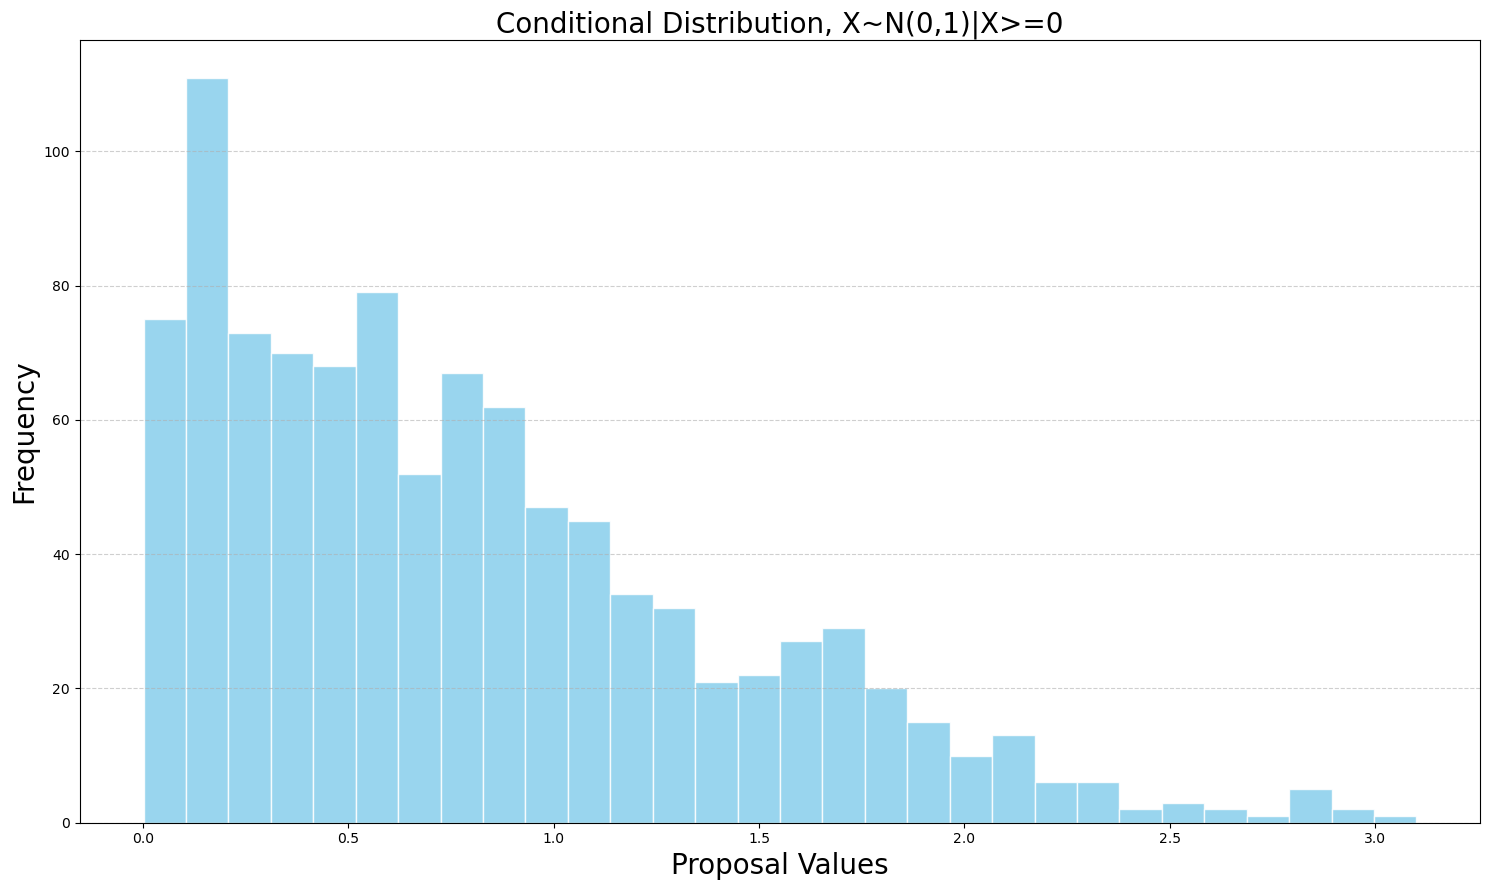

In [10]:
# slide 2
n = 1000
counter = 0
target_sample = []
mu, sigma = 0, 1

while counter < n:
    proposal = np.random.normal(loc=mu, scale=sigma)
    if proposal > 0:
        target_sample.append(proposal)
        counter += 1

plt.figure(figsize=(15, 9))
plt.hist(target_sample, bins=30, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Conditional Distribution, X~N(0,1)|X>=0", fontsize=20)
plt.xlabel("Proposal Values", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

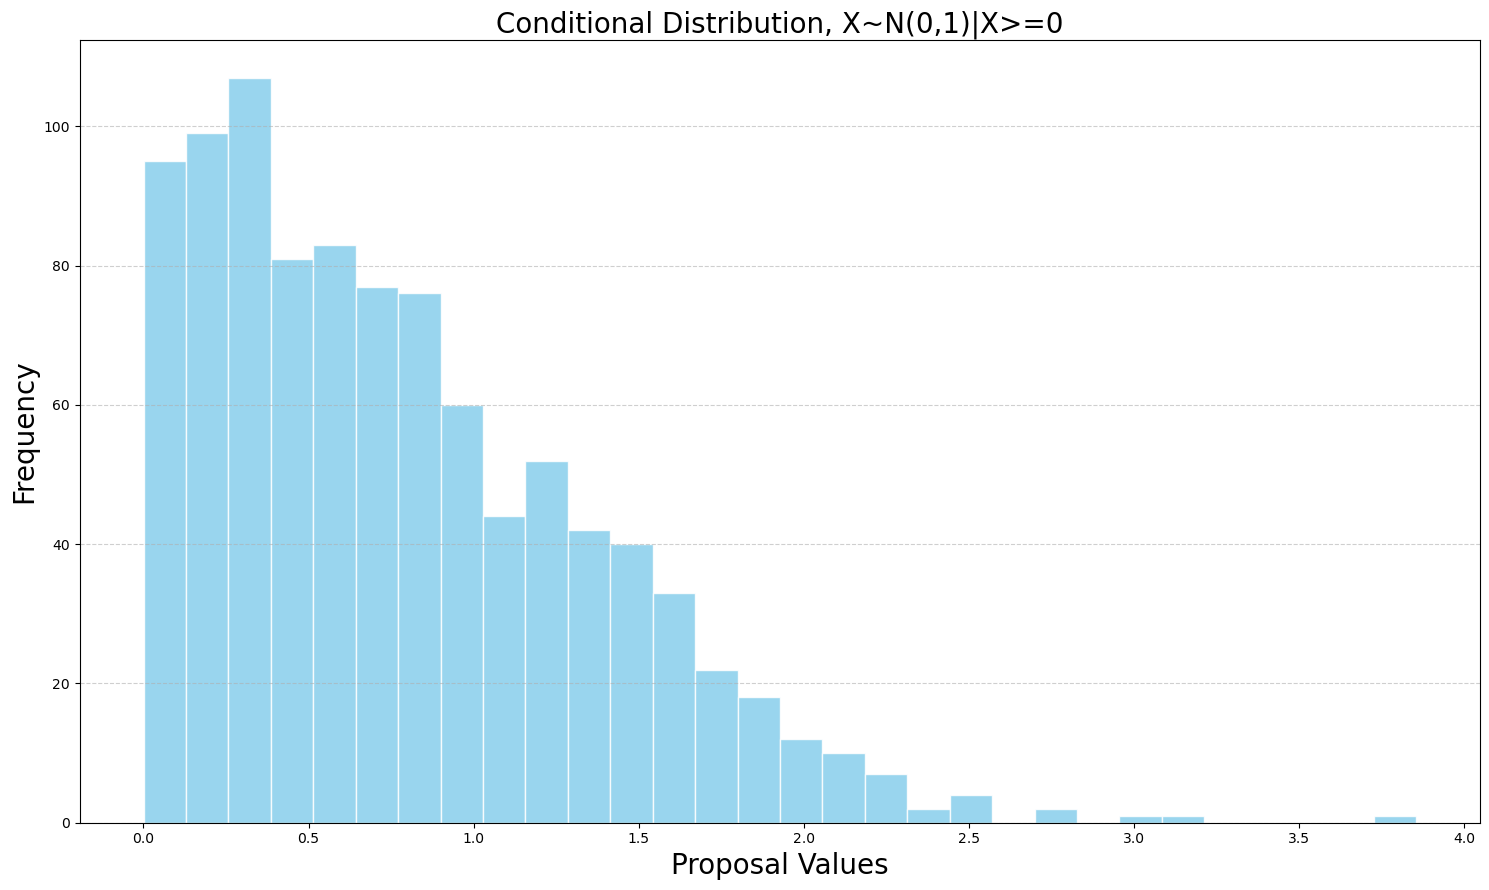

In [11]:
# slide 3
n = 1000
mu, sigma = 0, 1
samples = np.random.normal(loc=mu, scale=sigma, size=n*2)
target_sample = samples[samples > 0]
target_sample = target_sample[:n]

plt.figure(figsize=(15, 9))
plt.hist(target_sample, bins=30, color="skyblue", edgecolor="white", alpha=0.85)
plt.title("Conditional Distribution, X~N(0,1)|X>=0", fontsize=20)
plt.xlabel("Proposal Values", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

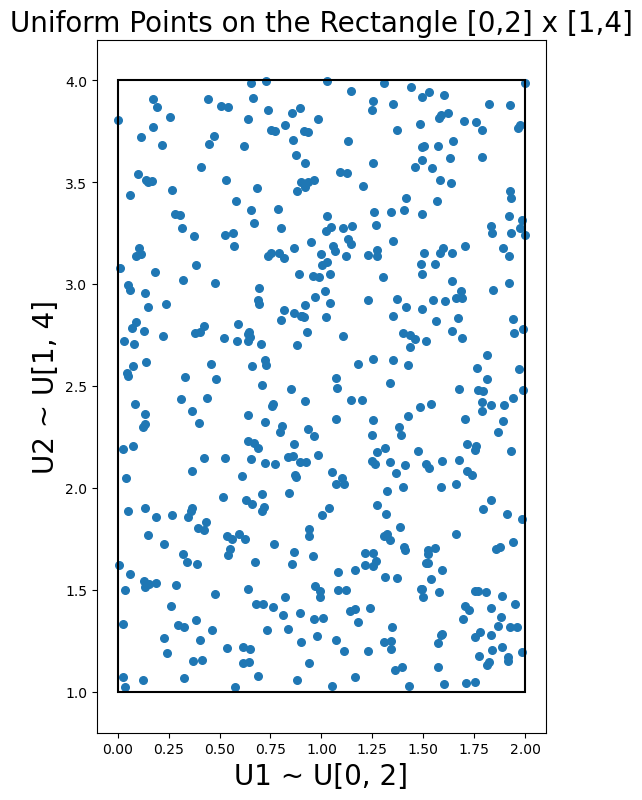

In [12]:
# slide 8
# number of points
n = 500
X = np.random.uniform(0, 2, n)
Y = np.random.uniform(1, 4, n)

# create the scatter plot
fig, ax = plt.subplots(figsize=(15,9))
ax.scatter(X, Y, s=30, alpha=1)
rect = Rectangle((0, 1), 2, 3, fill=False, linewidth=1.5)
ax.add_patch(rect)

# add labels and title
ax.set_xlabel('U1 ~ U[0, 2]', fontsize=20)
ax.set_ylabel('U2 ~ U[1, 4]', fontsize=20)
ax.set_title('Uniform Points on the Rectangle [0,2] x [1,4]', fontsize=20)
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(0.8, 4.2)
ax.set_aspect('equal', adjustable='box')
plt.show()

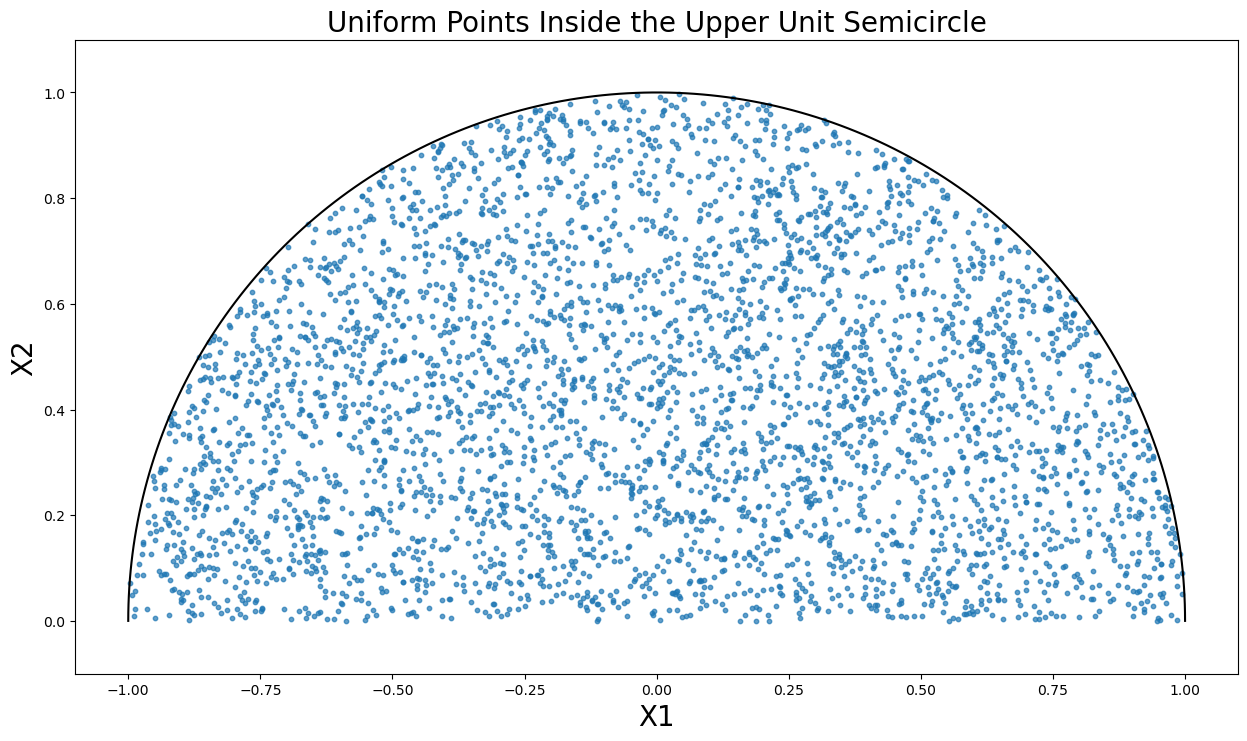

In [13]:
# ---------------------------
# Algorithm: Rejection Sampling Inside Unit Semicircle
# ---------------------------
def sample_semicircle(n, seed=None):
    """
    Generate n points uniformly distributed inside the upper semicircle
    defined by x^2 + y^2 < 1 and y >= 0 using rejection sampling.
    
    Args:
        n (int): Number of candidate points to generate (before rejection)
        seed (int, optional): Random seed for reproducibility
    
    Returns:
        X1, X2 (arrays): Coordinates of accepted points inside the semicircle
    """
    if seed is not None:
        np.random.seed(seed)
    
    U1 = np.random.uniform(-1, 1, n)
    U2 = np.random.uniform(0, 1, n)
    mask = U1**2 + U2**2 < 1
    X1 = U1[mask]
    X2 = U2[mask]
    
    return X1, X2

# generate points
n = 5000
X1, X2 = sample_semicircle(n, seed=42)

# plot
fig, ax = plt.subplots(figsize=(15, 9))
ax.scatter(X1, X2, s=10, alpha=0.7)
theta = np.linspace(0, np.pi, 200)
ax.plot(np.cos(theta), np.sin(theta), linewidth=1.5,color='black')
ax.set_xlabel('X1', fontsize=20)
ax.set_ylabel('X2', fontsize=20)
ax.set_title('Uniform Points Inside the Upper Unit Semicircle', fontsize=20)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

### Part 5

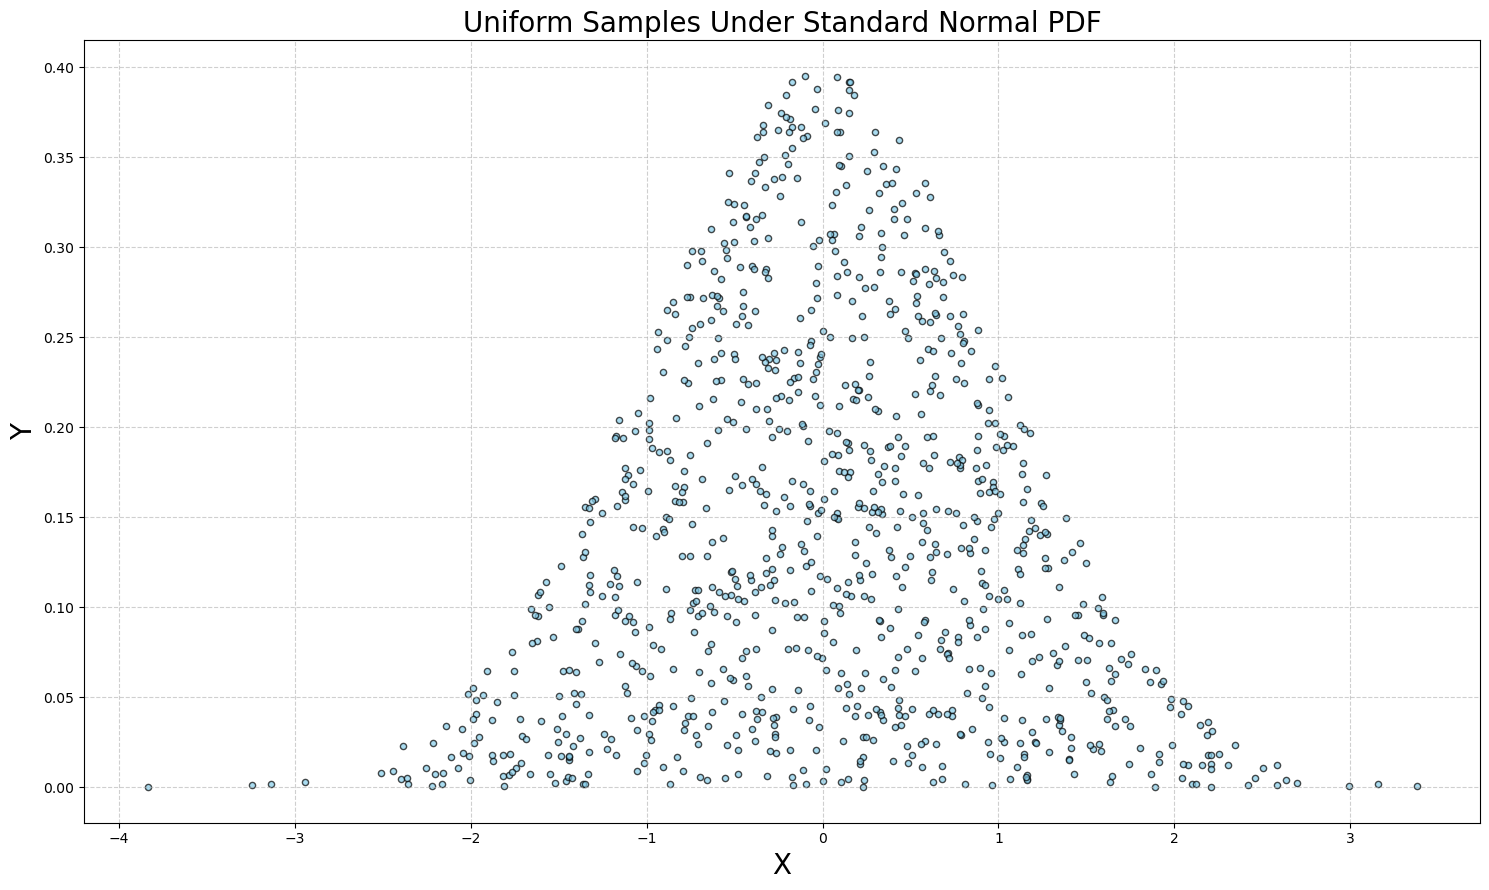

In [14]:
# slide 4
n = 1000
X = np.random.normal(size=n)
Z = norm.pdf(X)
Y = np.random.uniform(0, Z)

plt.figure(figsize=(15, 9))
plt.scatter(X, Y, color='skyblue', s=20, alpha=0.7, edgecolor='k')  # filled dots with alpha
plt.title('Uniform Samples Under Standard Normal PDF', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Part 6

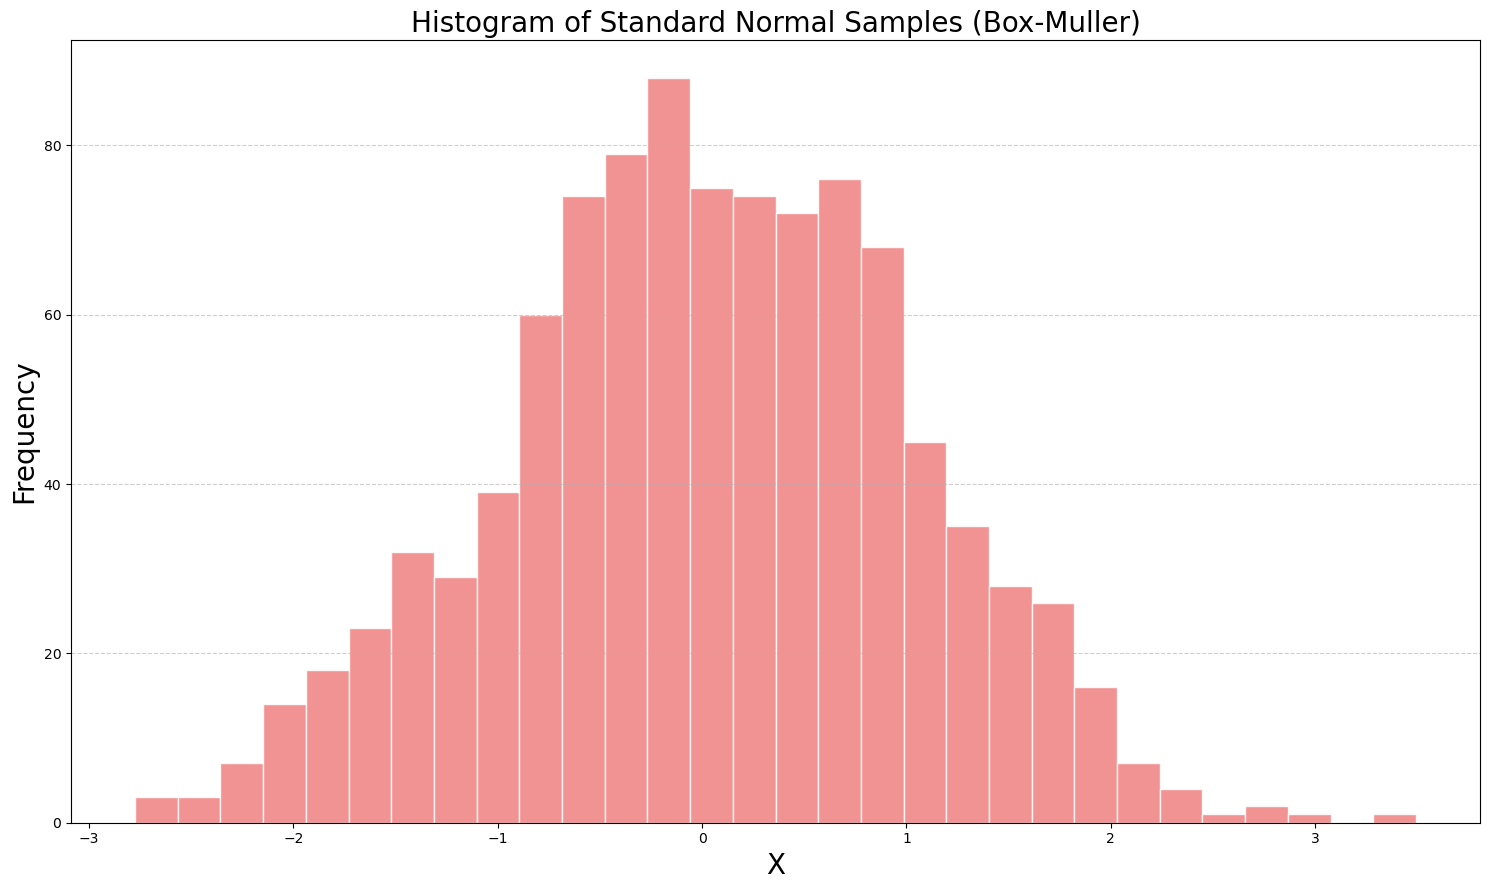

In [15]:
# slide 5
n = 1000
m = n // 2
X = np.zeros(n)
R = np.zeros(m)
U = np.random.uniform(0,1,m)
Theta = np.random.uniform(0, 2*np.pi, m)

# Box-Muller transform
for i in range(m):
    R[i] = np.sqrt(-2 * np.log(U[i]))
    X[2*i] = R[i] * np.cos(Theta[i])
    X[2*i+1] = R[i] * np.sin(Theta[i])

# Plot histogram nicely
plt.figure(figsize=(15,9))
plt.hist(X, bins=30, color='lightcoral', edgecolor='white', alpha=0.85)
plt.title('Histogram of Standard Normal Samples (Box-Muller)', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()